<a href="https://colab.research.google.com/github/shubhamgautam1211/Machine-Learning-Standalone/blob/main/SG_12_Logistic_HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm
from statistics import mean

In [ ]:
df = pd.read_csv('framingham.csv')
df.head(5)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.nunique()

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1364
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

In [ ]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


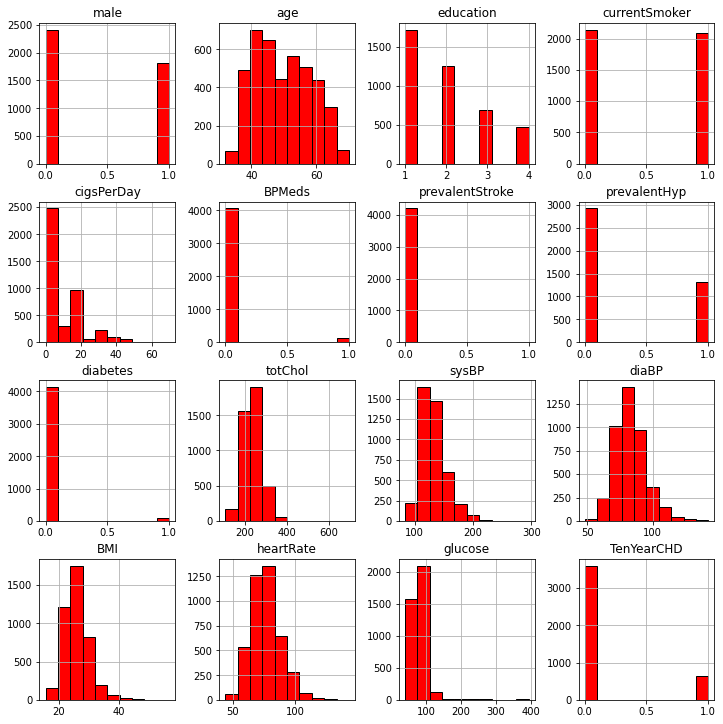

In [ ]:
df.hist(figsize=(10,10),color='r',edgecolor='black')
plt.tight_layout(pad=0.5)
plt.show()

### **few were diabetic , No Prevalent Stoke , on BP medication or prevalent Hypertension, also seems to be a little imbalanced data**

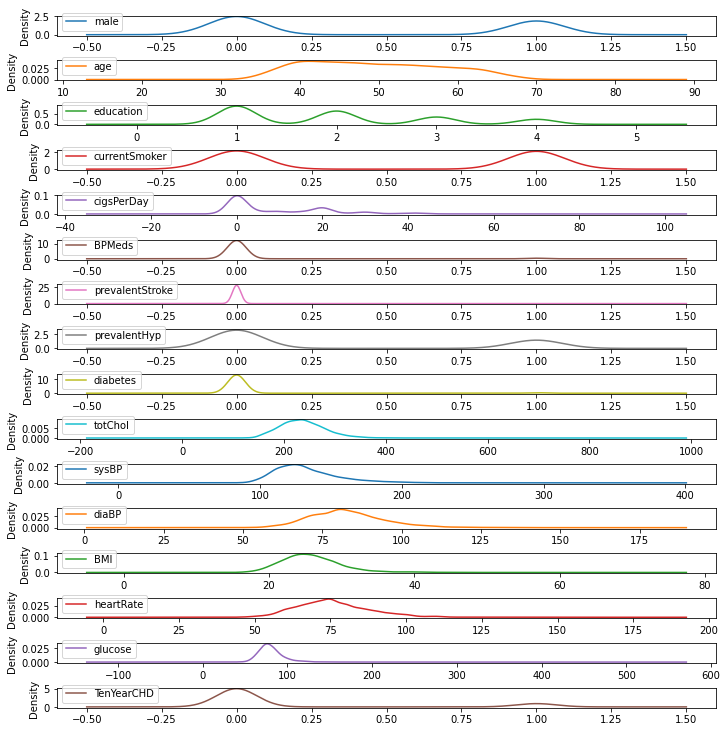

In [ ]:
df.plot(kind = 'density',subplots=True,sharex = False,figsize = (10,10))
plt.tight_layout(pad=0.3)
plt.show()

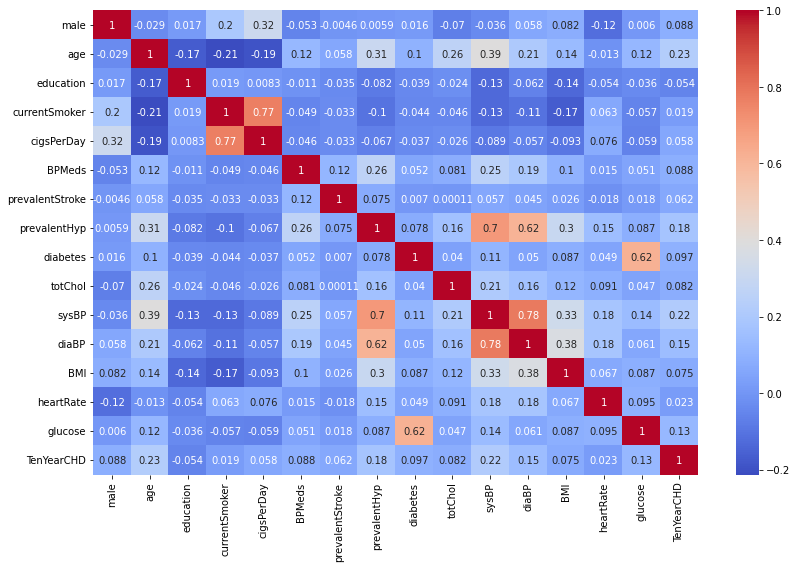

In [ ]:
corr = df.corr()           # closer to 1 more is the co-relation 
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap = "coolwarm")
plt.tight_layout()
plt.show()

### **Ten year risk of developing CHD - no corr above 0.5**

### **systolic and diastolic blood pressures , current smoker and cigs per day - high correlation**

### **education having corr in -ve, So therefore after analysis dropping undesirable features**

In [ ]:
df.drop(['education','diaBP','cigsPerDay'],axis=1,inplace=True)
df.head(5)

,male,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0,0,0,195.0,106.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0,0,0,250.0,121.0,28.73,95.0,76.0,0
2,1,48,1,0.0,0,0,0,245.0,127.5,25.34,75.0,70.0,0
3,0,61,1,0.0,0,1,0,225.0,150.0,28.58,65.0,103.0,1
4,0,46,1,0.0,0,0,0,285.0,130.0,23.10,85.0,85.0,0


## **Imputing missing values**

In [ ]:
print(df.isnull().sum())

male                 0
age                  0
currentSmoker        0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


## **Check for the outliers in the columns and treat the outliers if present**

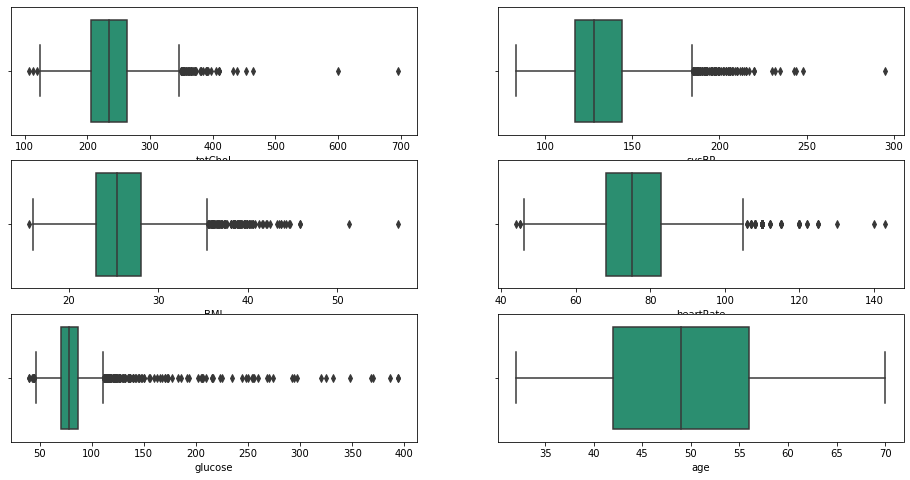

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(3,2,1)
sns.boxplot(x = df['totChol'],palette='Dark2')
plt.subplot(3,2,2)
sns.boxplot(x = df['sysBP'],palette='Dark2')
plt.subplot(3,2,3)
sns.boxplot(x = df['BMI'],palette='Dark2')
plt.subplot(3,2,4)
sns.boxplot(x = df['heartRate'],palette='Dark2')
plt.subplot(3,2,5)
sns.boxplot(x = df['glucose'],palette='Dark2')
plt.subplot(3,2,6)
sns.boxplot(x = df['age'],palette='Dark2')
plt.show()

## **Using Log Transformation on outliers , also then confirming that  skewness value is reduced**

In [ ]:
df["glucose"] = df["glucose"].map(lambda i: np.log(i) if i > 0 else 0)
df["totChol"] = df["totChol"].map(lambda i: np.log(i) if i > 0 else 0)

print(df['glucose'].skew())
print(df['totChol'].skew())

-2.70545354365983
-7.835377988634176


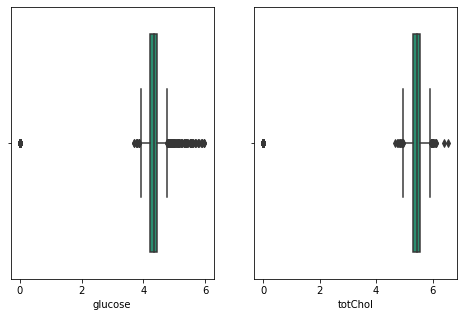

In [ ]:
plt.figure(figsize=(8,5))            # comparing before and after applying log 
plt.subplot(1,2,1)
sns.boxplot(x = df['glucose'],palette='Dark2')
plt.subplot(1,2,2)
sns.boxplot(x = df['totChol'],palette='Dark2')

plt.show()

In [ ]:
df.head(5)

,male,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0,0,0,5.273000,106.0,26.97,80.0,4.343805,0
1,0,46,0,0.0,0,0,0,5.521461,121.0,28.73,95.0,4.330733,0
2,1,48,1,0.0,0,0,0,5.501258,127.5,25.34,75.0,4.248495,0
3,0,61,1,0.0,0,1,0,5.416100,150.0,28.58,65.0,4.634729,1
4,0,46,1,0.0,0,0,0,5.652489,130.0,23.10,85.0,4.442651,0


In [ ]:
df.dropna(axis = 0, inplace = True) 
print(df.shape)

(4167, 13)


## **Split the dataset into train and test.** 

In [ ]:
X_feature = df.loc[:, df.columns != 'TenYearCHD']
Y_target = df.loc[:, df.columns == 'TenYearCHD']

print(X_feature.shape)
print(Y_target.shape)

(4167, 12)
(4167, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_feature, Y_target, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3333, 12)
(834, 12)
(3333, 1)
(834, 1)


## **Construct logistic regression model to predict the heart disease and check the accuracy scores for train and test subsets**

In [ ]:
model = LogisticRegression(max_iter=3000)        #c = 1/lambda , by default = 1 

model_try = LogisticRegression(C=0.25,max_iter=3000)

In [ ]:
# Fit the model
model.fit(X_train, Y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predict on testing set X_test
y_pred_test = model.predict(X_test)

# Predict on testing set X_train
y_pred_train = model.predict(X_train)

In [ ]:
test_accuracy_sklearn = accuracy_score(Y_test,y_pred_test)

train_accuracy_sklearn = accuracy_score(Y_train,y_pred_train)

print(f"\nAccuracy on testing set: {test_accuracy_sklearn}")

print(f"\nAccuracy on training set: {train_accuracy_sklearn}")


Accuracy on testing set: 0.8633093525179856

Accuracy on training set: 0.849084908490849


### **Use cross validation and stratified cross-validation to construct another** **logistic regression models**

In [ ]:
print("Cross Validation Logistic Regression")
print("---------------------------------")

model = svm.SVC()
accuracy = cross_val_score(model, X_feature, Y_target.values.ravel(), scoring='accuracy',cv=10)
print("Accuracy of Model with Cross Validation(both testing and training) is:",accuracy.mean())

Cross Validation Logistic Regression
---------------------------------
Accuracy of Model with Cross Validation(both testing and training) is: 0.8507321066223945


In [ ]:
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X_feature)
y_scaled = Y_target.values.ravel()
mod = LogisticRegression()
kgf = StratifiedKFold(n_splits=3, shuffle=True, random_state=21)
stratified = []
  
for train_index, test_index in kgf.split(X_feature,Y_target):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y_scaled[train_index], y_scaled[test_index]
    mod.fit(x_train_fold, y_train_fold)
    stratified.append(mod.score(x_test_fold, y_test_fold))
  
# Print the output.
print("Stratified Cross Validation")
print("---------------------------------")
print('\nOverall Accuracy considering Testing and Training set:',mean(stratified))

Stratified Cross Validation
---------------------------------

Overall Accuracy considering Testing and Training set: 0.851451883849292


# **Accuracy is ranging from 0.84 to 0.88 for all constructed models , best being the normal logistic regression model** 